<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/02_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Equilibrio entre Sesgo y Varianza



Todos los modelos tienen un error asociado a sus predicciones. Al entrenar modelos con **muestras de una población más grande**, estos siempre reflejarán error debido al muestreo realizado.

- Los modelos **demasiado sencillos**, sufren de error de tipo **sesgo**, en el que NO son sensibles a las variabilidades de la muestra con que se entrenan. Generalizan mejor, memorizan peor, más orientados a predicción.
- Los modelos **demasiado complejos**, sufren de error de tipo **varianza**, en el que son hipersensibles a las variabilidades de la muestra con que se entrenan. Generalizan peor, memorizan mejor, más orientados a análisis.
- Los modelos **equilibrados entre sencillez y complejidad**, tienden a minimizar el error total del modelo. Sin embargo, siempre hay un error irreducible.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



# Creacion de la poblacion

In [2]:
X = np.arange(-3,3,.01)
noise = [np.random.normal(0,.3) for _ in X]
#noise = 0
system1 = np.poly1d([.03,.02,.01])
system2 = np.sin
population = system2(X) + noise



## Muestreo inicial

In [3]:
sample_i = np.random.choice(list(range(len(population))),20)
sample_i = np.sort(sample_i)


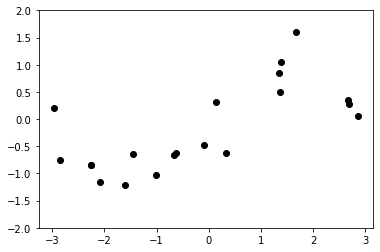

In [4]:
plt.scatter(X[sample_i],population[sample_i],c="k")
plt.ylim(-2,2)
plt.show()



## Entrenamiento de modelos y representar predicción



Entrenamos modelos que se ajusten a las muestras extraidas de la población



Un modelo sencillo

In [5]:
Z_simple = np.polyfit(X[sample_i], population[sample_i],1)
Z_simple = np.poly1d(Z_simple)
print(Z_simple)

# A balanced model
Z_balanced = np.polyfit(X[sample_i], population[sample_i],3)
Z_balanced = np.poly1d(Z_balanced)
print(Z_balanced)

# A complex model
Z_complex = np.polyfit(X[sample_i], population[sample_i],50)
Z_complex = np.poly1d(Z_complex)
print(Z_complex)

 
0.2853 x - 0.1336
         3           2
-0.1008 x + 0.00904 x + 0.8919 x - 0.1431
           50             49             48             47
1.011e-17 x  + 1.449e-17 x  + 7.469e-17 x  + 1.185e-16 x 
              46             45             44             43
 + 5.113e-16 x  + 9.178e-16 x  + 3.042e-15 x  + 6.568e-15 x 
              42             41             40             39
 + 1.258e-14 x  + 4.097e-14 x  - 2.311e-14 x  + 1.838e-13 x 
              38             37            36             35
 - 1.413e-12 x  - 1.443e-13 x  - 2.27e-11 x  - 1.792e-11 x 
              34             33             32             31
 - 2.784e-10 x  - 3.057e-10 x  - 2.935e-09 x  - 3.896e-09 x 
              30             29            28             27
 - 2.709e-08 x  - 4.263e-08 x  - 2.11e-07 x  - 4.104e-07 x 
              26             25             24             23
 - 1.179e-06 x  - 3.344e-06 x  - 2.371e-07 x  - 1.905e-05 x 
              22             21            20            19
 + 0

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
Y_simple = Z_simple(X[sample_i])
Y_balanced = Z_balanced(X[sample_i])
Y_complex = Z_complex(X[sample_i])

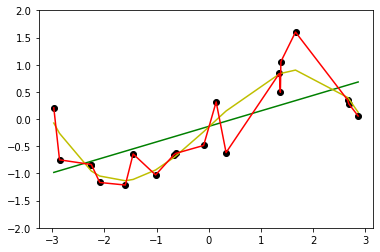

In [7]:
plt.scatter(X[sample_i], population[sample_i], c="k")
plt.plot(X[sample_i], Y_simple, c="g")
plt.plot(X[sample_i], Y_balanced, c="y")
plt.plot(X[sample_i], Y_complex, c="r")
plt.ylim(-2,2)
plt.show()




- Primera aproximación, modelo más simple asume que los datos son incrementales, mínima precisión en esta muestra.

- Segunda aproximación, modelo intermedio, sensible a la **forma** de los datos.  

- Tercera aproximación, modelo más complejo, hipersensible a la forma de los datos, máxima precisión en esta muestra.



## Estudio de los modelos



Para ver como responderían estos modelos ante todas las entradas de X (NO de la poblacion), dibujamos los modelos completamente.

In [8]:
Y_simple_ = Z_simple(X)
Y_balanced_ = Z_balanced(X)
Y_complex_ = Z_complex(X)

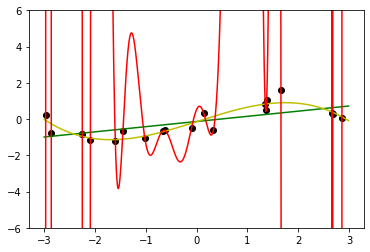

In [9]:
plt.scatter(X[sample_i], population[sample_i], c="k")
plt.plot(X, Y_simple_, c="g")
plt.plot(X, Y_balanced_,c ="y")
plt.plot(X, Y_complex_, c="r")
plt.ylim(-6,6)
plt.show()




## Errores

In [10]:
error_simple = abs(Y_simple-population[sample_i])
error_balanced = abs(Y_balanced-population[sample_i])
error_complex = abs(Y_complex-population[sample_i])

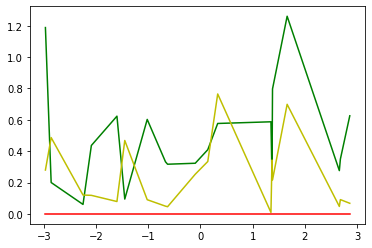

In [11]:
plt.plot(X[sample_i], error_simple,c="g")
plt.plot(X[sample_i], error_balanced,c="y")
plt.plot(X[sample_i], error_complex,c="r")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

rms_simple = sqrt(mean_squared_error(population[sample_i], Y_simple)) 
print(rms_simple)
rms_balanced = sqrt(mean_squared_error(population[sample_i], Y_balanced)) 
print(rms_balanced)
rms_complex = sqrt(mean_squared_error(population[sample_i], Y_complex)) 
print(rms_complex)

0.5673429260837487
0.3182170121015595
5.363473747683914e-09




El modelo que menor error comete en la muestra usada (conjunto de entreamiento) es el más complejo. Podemos utilizar los coeficientes para analizar esta muestra.



# Nuevos datos



Con una nueva muestra de la población, evaluamos los modelos generados.  
Para ello tomamos 20 nuevos indices de la poblacion, y realizamos predicciones con los modelos creados.

In [13]:
sample_new = np.random.choice(list(range(len(population))),20)
sample_new = np.sort(sample_new)

In [14]:
Y_simple_new = Z_simple(X[sample_new])
Y_balanced_new = Z_balanced(X[sample_new])
Y_complex_new = Z_complex(X[sample_new])



Representamos las predicciones de los modelos para la nueva muestra.

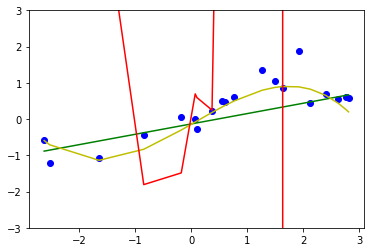

In [15]:
plt.scatter(X[sample_new], population[sample_new] ,c="b")
plt.plot(X[sample_new], Y_simple_new ,c="g")
plt.plot(X[sample_new], Y_balanced_new ,c="y")
plt.plot(X[sample_new], Y_complex_new ,c="r")
plt.ylim(-3,3)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
rms_simple = sqrt(mean_squared_error(sample_new, Y_simple_new)) 
print(rms_simple)
rms_balanced = sqrt(mean_squared_error(sample_new, Y_balanced_new)) 
print(rms_balanced)
rms_complex = sqrt(mean_squared_error(sample_new, Y_complex_new)) 
print(rms_complex)

401.6728092929675
401.5562589400236
36763.50017704189




El modelo más complejo es el que comete más error al recibir nuevos datos. Los modelos más sencillos son también más robustos. 
> Por tanto para predicción es mejor **modelos que generalicen bien, sin perder la sensibilidad a la forma**.